# Paper ST-Sloping - 1000x Random Split Result Analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.facecolor'] = 'white'

## Load Results

In [2]:
random_split_4beat_df = pd.read_csv('result/bin_4beats_1000x_random_split.csv', index_col=0)
random_split_6beat_df = pd.read_csv('result/bin_6beats_1000x_random_split.csv', index_col=0)
random_split_8beat_df = pd.read_csv('result/bin_8beats_1000x_random_split.csv', index_col=0)
random_split_10beat_df = pd.read_csv('result/bin_10beats_1000x_random_split.csv', index_col=0)
random_split_16beat_df = pd.read_csv('result/bin_16beats_1000x_random_split.csv', index_col=0)
random_split_32beat_df = pd.read_csv('result/bin_32beats_1000x_random_split.csv', index_col=0)
random_split_64beat_df = pd.read_csv('result/bin_64beats_1000x_random_split.csv', index_col=0)

In [3]:
sec_array = ["4beats", "6beats", "8beats", "10beats", "16beats", "32beats", "64beats"]
random_split_array = [
    random_split_4beat_df,
    random_split_6beat_df, random_split_8beat_df,
    random_split_10beat_df, random_split_16beat_df,
    random_split_32beat_df, random_split_64beat_df
]

## Preview

In [4]:
random_split_10beat_df.head(3)

,accuracy,specificity,precision,recall,f1
0,0.923105,0.793991,0.922774,0.923105,0.920041
1,0.928225,0.810969,0.927762,0.928225,0.925741
2,0.924477,0.802508,0.924019,0.924477,0.921706


## Processing

In [5]:
df_accuracy = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_accuracy[sec] =          df['accuracy']

df_specificity = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_specificity[sec] =       df['specificity']

df_precision = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_precision[sec] =         df['precision']

df_recall = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_recall[sec] =            df['recall']

df_f1 = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_f1[sec] =                df['f1']

metrics = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    row = dict()
    row['aaa_name'] = sec
    row['acc_avg'] =                 df["accuracy"].mean()
    row['acc_sd'] =                  df["accuracy"].std()
    row['specificity_avg'] =         df["specificity"].mean()
    row['specificity_sd'] =          df["specificity"].std()
    row['precision_avg'] =           df["precision"].mean()
    row['precision_sd'] =            df["precision"].std()
    row['recall_avg'] =              df["recall"].mean()
    row['recall_sd'] =               df["recall"].std()
    row['f1_avg'] =                  df["f1"].mean()
    row['f1_sd'] =                   df["f1"].std()
    metrics = metrics.append(row, ignore_index=True)

## Box plot table

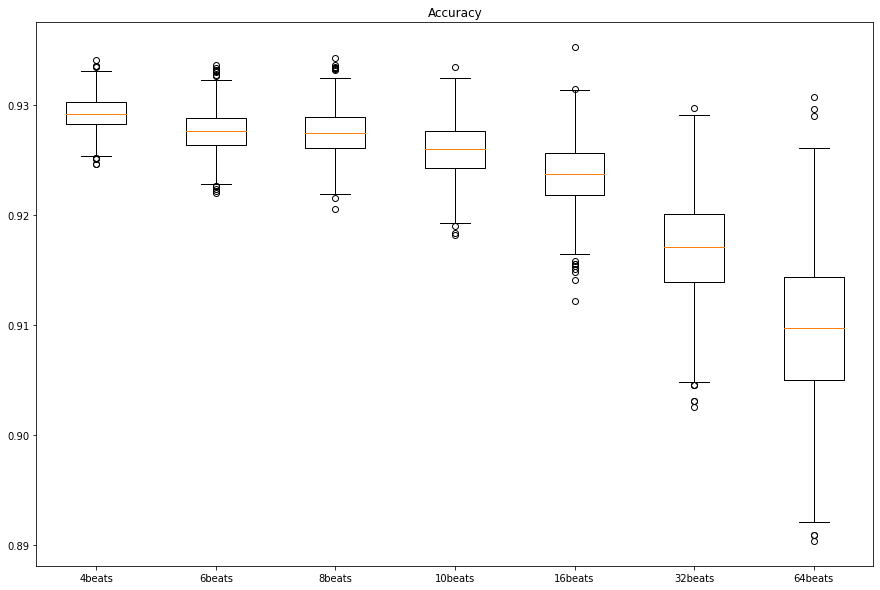

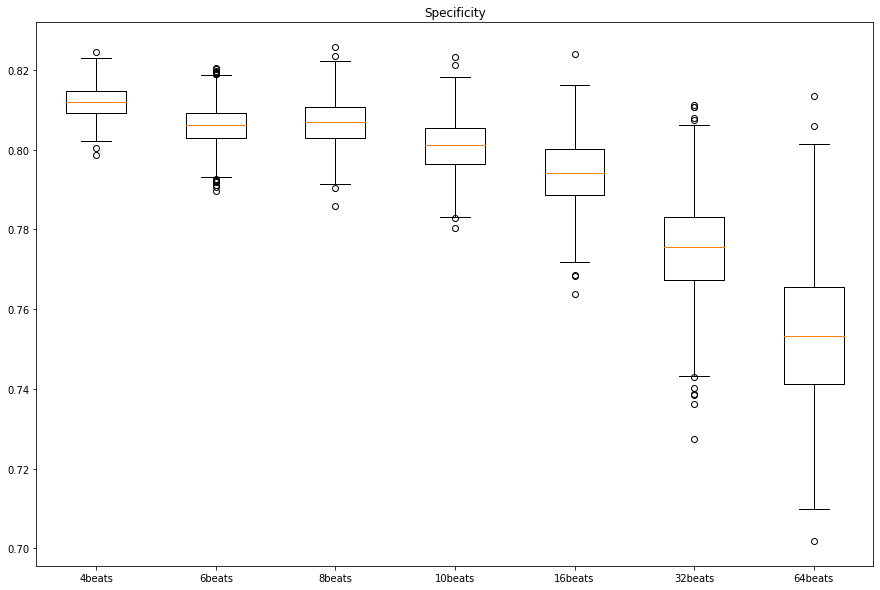

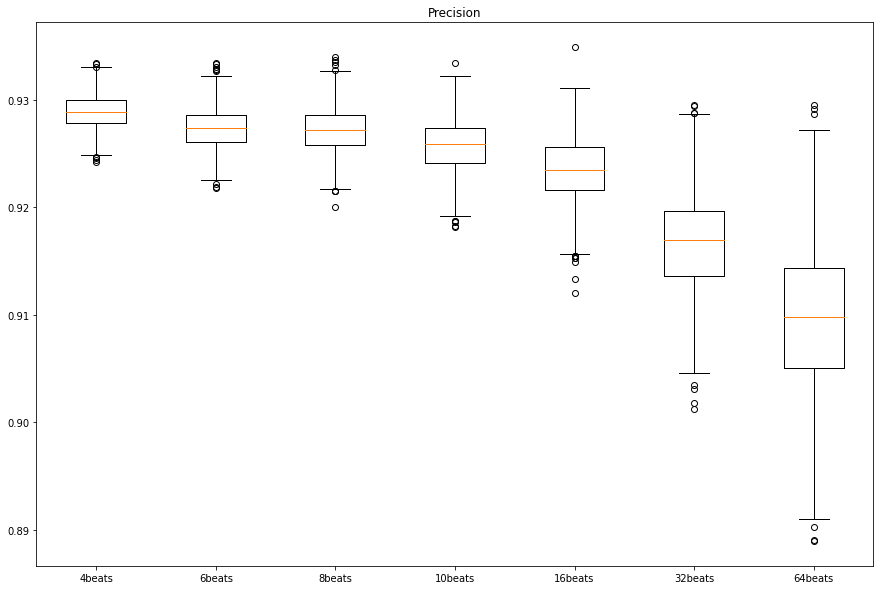

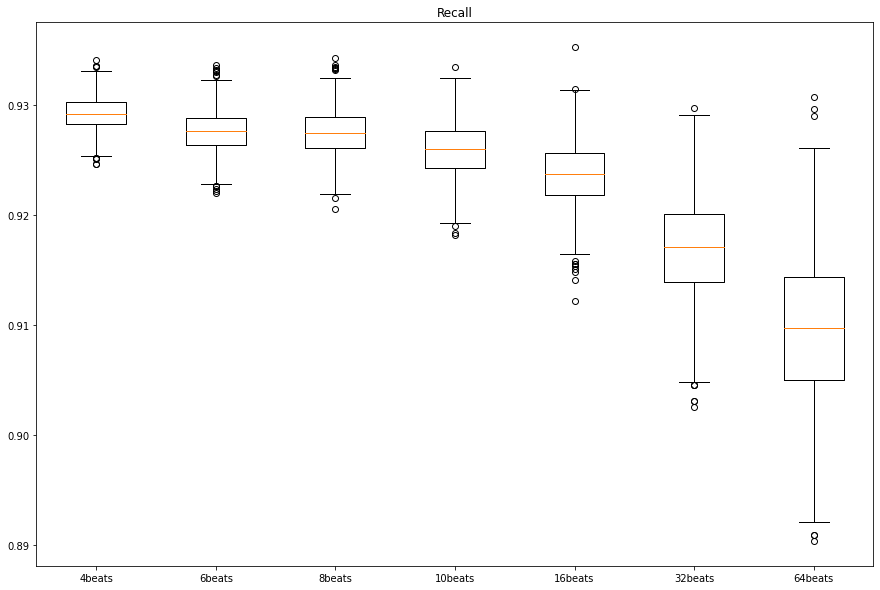

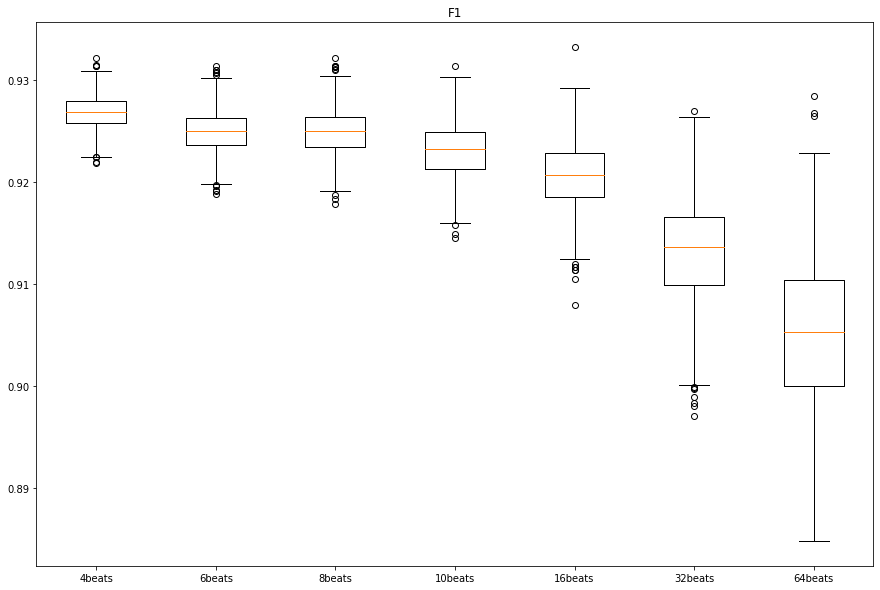

In [6]:
plt.boxplot(x=df_accuracy, labels=df_accuracy.columns)
plt.title("Accuracy")
plt.show()

plt.boxplot(x=df_specificity, labels=df_specificity.columns)
plt.title("Specificity")
plt.show()

plt.boxplot(x=df_precision, labels=df_precision.columns)
plt.title("Precision")
plt.show()

plt.boxplot(x=df_recall, labels=df_recall.columns)
plt.title("Recall")
plt.show()

plt.boxplot(x=df_f1, labels=df_f1.columns)
plt.title("F1")
plt.show()

## Summary table

In [7]:
metrics.to_csv("result_aggregate/aggregate_result_bin_1000x_random_split.csv")
metrics.head(10)

,aaa_name,acc_avg,acc_sd,specificity_avg,specificity_sd,precision_avg,precision_sd,recall_avg,recall_sd,f1_avg,f1_sd
0,4beats,0.929283,0.001546,0.812047,0.004034,0.928930,0.001566,0.929283,0.001546,0.926809,0.001651
1,6beats,0.927610,0.001843,0.806027,0.005013,0.927325,0.001853,0.927610,0.001843,0.924936,0.001984
2,8beats,0.927557,0.002079,0.806764,0.005715,0.927216,0.002103,0.927557,0.002079,0.924918,0.002231
3,10beats,0.925977,0.002456,0.800877,0.006549,0.925756,0.002476,0.925977,0.002456,0.923121,0.002644
4,16beats,0.923785,0.003022,0.794274,0.008187,0.923559,0.003042,0.923785,0.003022,0.920713,0.003268
5,32beats,0.916985,0.004478,0.775037,0.012208,0.916724,0.004506,0.916985,0.004478,0.913223,0.004898
6,64beats,0.909690,0.006881,0.753586,0.017407,0.909572,0.006899,0.909690,0.006881,0.905000,0.007580


## Summary table mean only

In [8]:
metrics_mean_only = metrics[["aaa_name", "acc_avg", "specificity_avg", "precision_avg", "recall_avg", "f1_avg"]]
metrics_mean_only.to_csv("result_aggregate/aggregate_mean_only_result_bin_1000x_random_split.csv", sep=";")
metrics_mean_only.head(10)

,aaa_name,acc_avg,specificity_avg,precision_avg,recall_avg,f1_avg
0,4beats,0.929283,0.812047,0.928930,0.929283,0.926809
1,6beats,0.927610,0.806027,0.927325,0.927610,0.924936
2,8beats,0.927557,0.806764,0.927216,0.927557,0.924918
3,10beats,0.925977,0.800877,0.925756,0.925977,0.923121
4,16beats,0.923785,0.794274,0.923559,0.923785,0.920713
5,32beats,0.916985,0.775037,0.916724,0.916985,0.913223
6,64beats,0.909690,0.753586,0.909572,0.909690,0.905000
